<a href="https://colab.research.google.com/github/TurkuNLP/intro-to-nlp/blob/master/nn_classifier_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the network learning?

* We can gain some intuition in what the network is learning
* Especially fruitful will turn out to look at the weights of the hidden layer



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json
import pickle
from keras.models import Model, model_from_json


def load_model(model_name):

    with open(model_name+".model.json", "rt") as f:
        model=model_from_json(f.read())
    model.load_weights(model_name+".weights.h5")
    
    with open(model_name+".encoders.pickle","rb") as f:
        label_encoder,vectorizer=pickle.load(f)
    
    return model,label_encoder,vectorizer

#Model saved to drive at the end of the nn_bow_classifier notebook!
model,label_encoder,vectorizer=load_model("/content/drive/MyDrive/intro-to-nlp/models-2021/imdb_bow")
print(model)

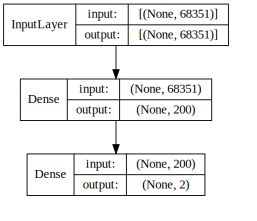

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,dpi=65).create(prog='dot', format='svg'))


* This is our model (watch out, Keras plots models from top to bottom)
* Hidden layer has N nodes with 74849 inputs each, one input for one word in the vocabulary
* We can also look at it the other way around: each word is assigned one weight for each hidden layer node
* So each word is seen by the network as a N-dimensional vector
* But what are these vectors? What properties should they have? Let us find out!

In [6]:
learned_weights=model.layers[1].get_weights()[0]
learned_weights.shape

(68351, 200)

* A good and easy way to explore the vectors is through their neighborhood
* This is easy to implement so let's try

In [7]:
import numpy

def nearest(word,learned_weights,vectorizer):
    inverse_vocab=dict((v,k) for k,v in vectorizer.vocabulary_.items())
    word_idx=vectorizer.vocabulary_[word]
    word_vector=learned_weights[word_idx]
    x=numpy.linalg.norm(word_vector-learned_weights,axis=-1)
    nearest=numpy.argsort(x)
    for idx in nearest[:30]:
        print(inverse_vocab[idx], end=", ")
    print()
    
nearest("bad",learned_weights,vectorizer)
nearest("terrible",learned_weights,vectorizer)

nearest("great",learned_weights,vectorizer)
nearest("enjoyable",learned_weights,vectorizer)


bad, wasted, endless, unwatchable, forwarding, embarrassed, dire, sooooo, puerile, turkey, unfunny, lackluster, telekinesis, stinks, mercifully, mentions, laughable, horrible, od, wasting, stinker, behave, unless, miscast, uninteresting, ashamed, annoying, meow, baseless, evel, 
terrible, worse, leaning, mess, mcgovern, lacks, dull, tashan, lousy, moonlighting, alleged, disappointing, rochon, completists, boredom, soap, boring, awful, wasting, mercifully, ardent, wuhrer, lackluster, avoid, unfunny, badly, dir, wasted, turkey, horrible, 
great, sailor, trained, entertaining, bewilderment, surpasses, hawke, endearingly, tripping, pleasantly, brisk, masterson, powerful, beautifully, wonderful, laputa, symbols, elephant, gently, novak, krell, cheer, fantastically, edie, elmer, drake, intense, da, packed, rosalind, 
enjoyable, flawless, relaxed, ankle, excellently, liu, braveheart, grander, sentenced, fantastic, rare, superbly, haunting, reveal, underrated, masterson, lotus, amazing, johnst